# Naive Predictions

In [1]:
# Native predictions for titanic survied.
# Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading csv file into dataframe.
titanic = pd.read_csv('./titanic/titanic-train.csv')

In [2]:
# get general information of the df
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# get first five rows of the df
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# create a deep copy of the df
df_train = titanic.copy()

# calculate the overall survived rate.
s = df_train['Survived'].value_counts()
print(s)
print(f'the survival rate is {s[1]/s.sum():.1%}')

0    549
1    342
Name: Survived, dtype: int64
the survival rate is 38.4%


In [5]:
# normalize the data
s_norm = df_train['Survived'].value_counts(normalize=True)
s_norm

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [6]:
# groupby the survived by gender. 
group = df_train.groupby('Sex')['Survived'].value_counts()
print(group.index)
group

MultiIndex([('female', 1),
            ('female', 0),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
# calculate the survived rate by genders.
print(f'female survival rate: {group["female", 1]/group["female"].sum():.1%}')
print(f'male survival rate: {group["male", 1]/group["male"].sum():.1%}')

female survival rate: 74.2%
male survival rate: 18.9%


In [8]:
# normalize the data.
group_norm = df_train.groupby('Sex')['Survived'].value_counts(normalize=
True)
group_norm

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [9]:
# loading the test data and ready to run the model.
df_test = pd.read_csv('./titanic/titanic-test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# first predict all passengers survived=0 which is dead, because the survival rate is only 38.4%.
df_test['survived'] = 0
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [11]:
# output the result into a csv file.
df_submit_allzero = df_test[['PassengerId', 'survived']]
df_submit_allzero.to_csv('./Assignment5/titanic_submit_allzero.csv', index=False)

In [12]:
# second predict all passengers survived =0 (dead) for male, and survied=1(survived) for female.
# this is because the survived rate for male is only 18.9% and survived rate for female is 74.2%.
df_test['Survived_gender'] = df_test['Sex'].apply(lambda x:0 if x=='male' else 1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived,Survived_gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [13]:
# output the result into a csv file.
df_submit_gender = df_test[['PassengerId', 'Survived_gender']]
# change column name to 'Survived' for Kaggle submission
df_submit_gender.to_csv('./Assignment5/titanic_submit_gender.csv', index=False, header=['PassengerId', 'Survived'])

In [37]:
# predict a passenger survived rate based on their ticket class, passenger fare.
X = df_train[['Pclass','Fare']]
y = df_train['Survived']
print(X.shape)
print(y.shape)

(891, 2)
(891,)


In [38]:
# train a DT model by using all default settings
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
# for visulizing the tree
from IPython.display import Image 
from sklearn import tree
import pydotplus

In [40]:
# get feature and class names for visulization
print(X.columns.values.tolist())
print(y.unique().tolist())
cls_names = ['died' if i == 0 else 'survived' for i in y.unique().tolist ()] # convert to string for class names
cls_names

['Pclass', 'Fare']
[0, 1]


['died', 'survived']

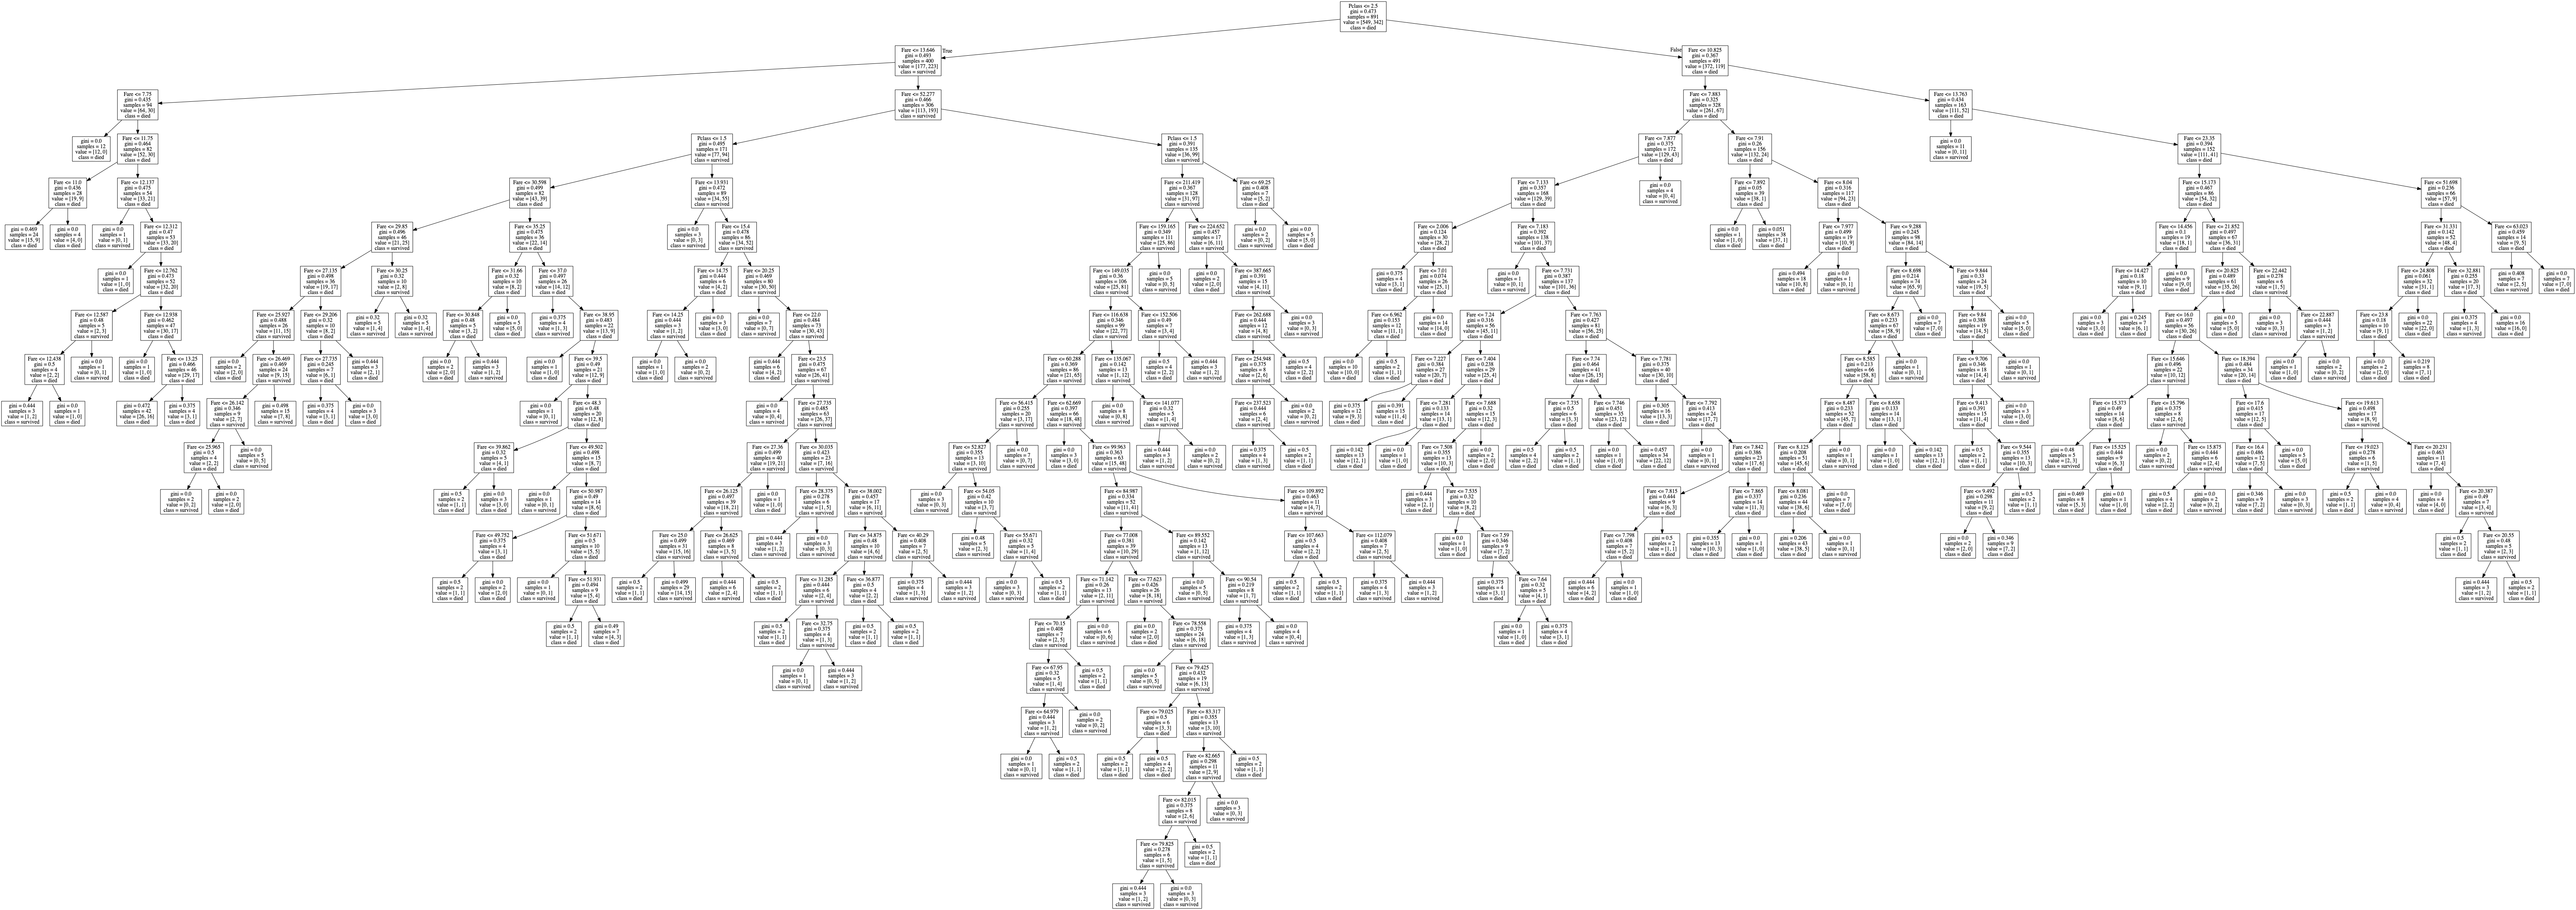

In [41]:
# Create DOT data
dot_data = tree.export_graphviz(tree_clf, feature_names=X.columns.values.tolist(),class_names=cls_names, )
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [42]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Create DOT data
dot_data = tree.export_graphviz(tree_clf, feature_names=X.columns.values.tolist(),
class_names=cls_names, )
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [44]:
# choose the subset of the test set
# there is a null value in Fare
X_test = df_test[['Pclass', 'Fare']] 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Fare    417 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [45]:
# fill the null value with mean
X_test = X_test.fillna(X_test.mean()) 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Fare    418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [46]:
y_hat = tree_clf.predict(X_test) 
y_hat

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [47]:
# combine the final dataframe
df_submit_simpleDT = pd.DataFrame({'PassengerId': df_test['PassengerId'],'Survived': y_hat,})
df_submit_simpleDT.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [48]:
df_submit_simpleDT.to_csv('./Assignment5/titanic_submit_fareandpclass.csv', index=False)